This project aims to create a tool which can map the dominant colours of an image using k-means clustering algorithm.

In [5]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    FLAT_IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=5):
        self.CLUSTERS = clusters
        self.IMAGE = image
    
    def dominantColors(self):

        img = self.IMAGE
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.FLAT_IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #getting the colors as per dominance order
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        return self.COLORS.astype(int)
                
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.FLAT_IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    def colorPixels(self):
        
        shape = self.IMAGE.shape
        
        img = np.zeros((shape[0] * shape[1], 3))
        labels = self.LABELS

        for i,color in enumerate(self.COLORS):
            
            indices = np.where(labels==i)[0]
            
            for index in indices:
                img[index] = color
        
        img = img.reshape((shape[0], shape[1], 3)).astype(int)
        
        #display img
        plt.figure()
        plt.axis("off")
        plt.imshow(img)
        plt.show()
        
        
        



100 125
[[214  14  46]
 [240 240 242]
 [226  61  83]
 [227  30  60]
 [148 145 150]]


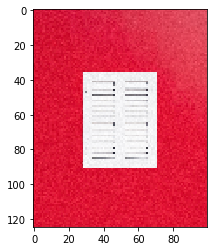

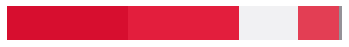

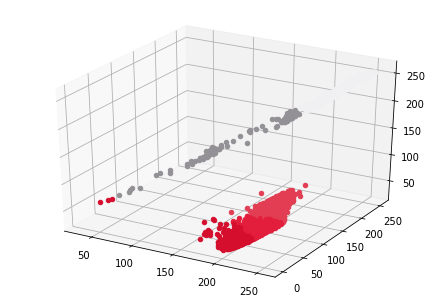

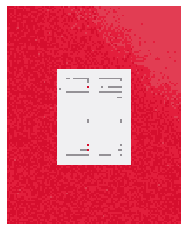

In [7]:
import cv2

#open image
#src = 'google.jpg'
src = cv2.imread('images/3.jpg', cv2.IMREAD_UNCHANGED)
#percent by which the image is resized
scale_percent = 50

#calculate the 50 percent of original dimensions

if src.shape[1] > 100:
    width = 100
    height = int(src.shape[0]/src.shape[1]*100)
else:
    width = src.shape[1]
    height = src.shape[0]
    
dsize = (width, height)

img = cv2.resize(src, dsize)

#convert to RGB from BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape[1], img.shape[0])

#no. of clusters
clusters = 5

#initialize using constructor
dc = DominantColors(img, clusters)

#print dominant colors
colors = dc.dominantColors()
print(colors)

plt.imshow(img)
plt.show()

#display dominance order
dc.plotHistogram()

#display clustered points
dc.plotClusters()

dc.colorPixels()